# Первая Лабораторная работа

In [3]:
import csv
import math
import pandas
import matplotlib
from typing import Dict

/var/folders/rt/dtq9j3h12sg3n9hstlmcg6c40000gn/T/ipykernel_67135/206828853.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


### Выводим нужные данные и строим графики

In [4]:
def show(data: Dict[str, float], sortedData: list[float]) -> None:
    firstFrame = pandas.DataFrame(sortedData)
    secondFrame = pandas.DataFrame(sortedData)
    firstFrame.plot()
    secondFrame.boxplot()
    print(data)

### Получаем и структурируем информацию

In [5]:
def getBarData(results: Dict[str, float]) -> Dict[str, float]:
    barData = {}
    barData['intervalsCount'] = int(results['selectionLength']/10)
    barData['step'] = round(results['selectionRange']/barData['intervalsCount'],2)
    
        # dataVariata = {value:rowData.count(value) for value in rowData}
    
    return barData

In [6]:
def getQuartile(data: list[float], n: float, param: float) -> float:
    expr = (n - 1) * param
    return data[expr+1] if expr==int(expr) else (data[int(expr)+1] + data[int(expr)+2])/2

In [7]:
def compute(data: list[float]) -> dict[str, float]:
    results: Dict[str, float] = {}
    frame = pandas.DataFrame(sortedData)
    
    results['selectionLength'] = len(sortedData)
    results['minElement'] = min(sortedData)
    results['maxElement'] = max(sortedData)
    results['selectionRange'] = results['maxElement'] - results['minElement']
    results['mean'] = round(sum(sortedData)/results['selectionLength'],2)
    results['meanByPandas'] = round(frame.mean().values[0],2)
    expr = (results['selectionLength']-1)/2
    results['median'] = sortedData[int(expr)+1] if expr==int(expr) else (sortedData[int(expr)+1] + sortedData[int(expr)+2])/2
    results['medianByPandas'] = round(frame.median().values[0],2)
    results['absoluteMeanDeviation'] = round(sum([x-results['mean'] for x in sortedData])/results['selectionLength'],3)
    results['dispersion'] = round(sum([(x-results['mean'])**2 for x in sortedData])/(results['selectionLength']-1),2)
    results['standardDeviation'] = round(math.sqrt(results['dispersion']),2)
    results['firstQuartile'] = getQuartile(sortedData, results['selectionLength'], 0.25)
    results['thirdQuartile'] = getQuartile(sortedData, results['selectionLength'], 0.75)
    results['interquartileLatitude'] = results['thirdQuartile'] - results['firstQuartile']
    results['asymmetryCoefficient'] = round(sum([(x-results['mean'])**3 for x in sortedData])/(results['selectionLength']*results['standardDeviation']**3),2)
    barData = getBarData(results)
    results['barData'] = barData
    
    return results

### Считываем данные из файла и вызываем функции Compute и Show

{'selectionLength': 92, 'minElement': 110.5, 'maxElement': 126.5, 'selectionRange': 16.0, 'mean': 121.0, 'meanByPandas': 121.0, 'median': 121.4, 'medianByPandas': 121.25, 'absoluteMeanDeviation': -0.002, 'dispersion': 8.04, 'standardDeviation': 2.84, 'firstQuartile': 119.1, 'thirdQuartile': 123.1, 'interquartileLatitude': 4.0, 'asymmetryCoefficient': -0.7, 'barData': {'intervalsCount': 9, 'step': 1.78}}


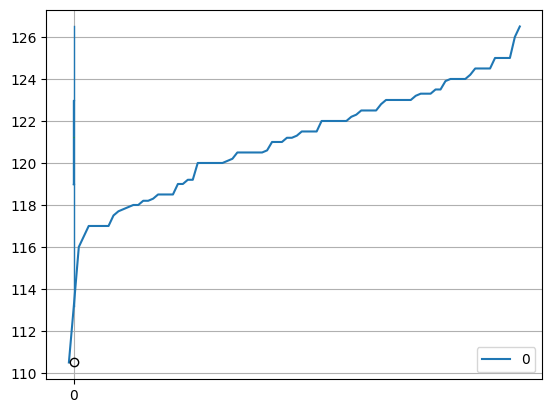

In [8]:
with open('data/r1z1.csv', 'r', newline='') as csvfile:
    csvReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    rowData = [''.join(row) for row in csvReader][1:]
    sortedData = list(map(float,rowData))
    sortedData.sort()
    results = compute(sortedData)
    show(results, sortedData)